### Contents
- Image Transformations
    - Translation
    - Rotation
    - Resize
    - Flipping
    - Cropping
- Image Arithmetic
- Bitwise Operations
- Masking
- Channel based image splitting & merging

### Image Transformations
#### Translation: Shifting of images along x and y axes

In [1]:
import numpy as np
import cv2
import sys
from PIL import Image
sys.path.append('../')
from modules.utils import cv2_to_PIL, translate, rotate, resize

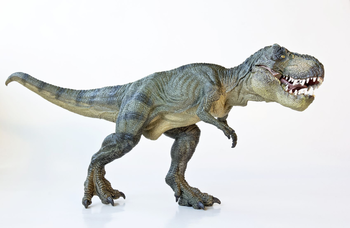

In [2]:
image = cv2.imread('../data/trex.png')
cv2_to_PIL(image)

__Translation Matrix__: 
- specifies no.of pixels to shift towards left or right, and up or down
- OpenCV expects these values to be float
- The matrix shape is (2*3)
- 1st row:[1, 0, tx], where tx is the number of pixels we will shift the image left or right. Negative values of tx will shift the image to the left and positive values will shift the image to the right.
- 2nd row of the matrix as [0, 1, ty],where ty is the number of pixels we will shift the image up or down. Negative value of ty will shift the image up and positive values will shift the image down.

In [3]:
trans_matrix = np.float32([
                            [1,0,25], #Shift the image 25 pixels to the right
                            [0,1,50]  #Shift the image 50 pixles to the bottom
                        ])

```cv2.wrapAffine``` 
Taking the image, the translation matrix & the shape of the output image, this OpenCV function does the actual translation

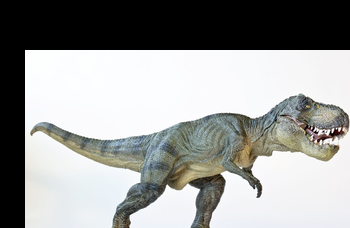

In [4]:
shifted = cv2.warpAffine(image, trans_matrix, (image.shape[1],image.shape[0]))
cv2_to_PIL(shifted)

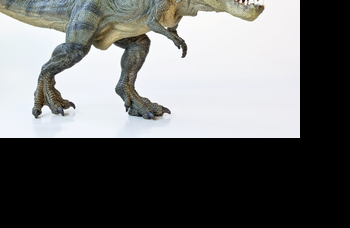

In [5]:
trans_matrix = np.float32([
                            [1,0,-50], 
                            [0,1,-90]  
                        ])
shifted = cv2.warpAffine(image, trans_matrix, (image.shape[1],image.shape[0]))
cv2_to_PIL(shifted)

Refer to ```modules.utils.translate```

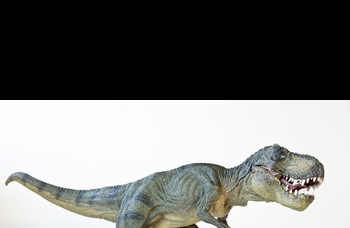

In [6]:
# Shift the image by 100 pixels to the bottom
shifted = translate(image,0,100)
cv2_to_PIL(shifted)

__Rotation__: Rotate an image by an angle $ \theta $
<br>
Negative $ \theta $ rotates clockwise

In [7]:
(h,w) = image.shape[:2]
center = (w//2, h//2)

```v2.getRotationMatrix2D```: Taking the center, $ \theta $ & scale of the image, this method generates the rotation matrix
- We can rotate the images from any point. Generally, center is taken

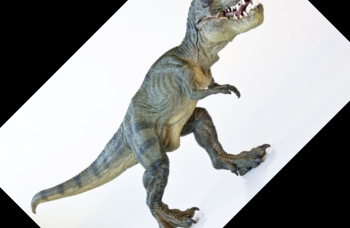

In [8]:
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0) #1.0 means the same dimensions of the image are used, 2.0 to double, 0.5 to half
rotated = cv2.warpAffine(image, rotation_matrix, (w,h))
cv2_to_PIL(rotated)

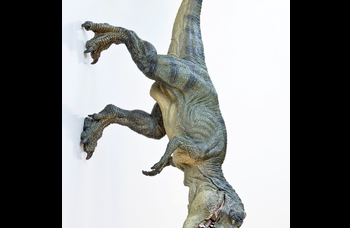

In [9]:
rotation_matrix = cv2.getRotationMatrix2D(center, -90, 1.0) #1.0 means the same dimensions of the image are used, 2.0 to double, 0.5 to half
rotated = cv2.warpAffine(image, rotation_matrix, (w,h))
cv2_to_PIL(rotated)

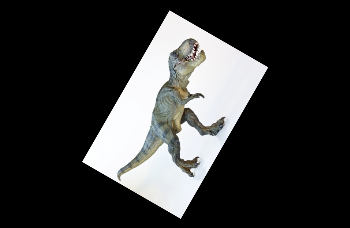

In [10]:
rotated = rotate(image, 60,scale=0.5)
cv2_to_PIL(rotated)

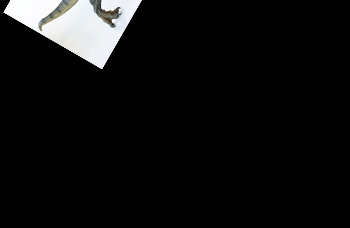

In [11]:
rotated = rotate(image, 60,(10,10), scale=0.5)
cv2_to_PIL(rotated)

__Resize__:

- __Aspect Ratio__: The aspect ratio is the proportional relationship of the width and the height of the image.
- __Interpolation__: to calculate pixel values for the new image from the original one

#### Resize based on width

In [12]:
new_width = 66
#Compute the ratio of new_width to the old_width
ratio = new_width/image.shape[1]
#new_height = old_height * ratio
new_dims = (new_width, int(image.shape[0]*ratio))
print(int(image.shape[0]*ratio))

42


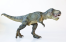

In [13]:
resized = cv2.resize(image, new_dims, interpolation = cv2.INTER_AREA)
cv2_to_PIL(resized)

#### Resize based on height

In [14]:
new_height = 110
ratio = new_height/image.shape[0]
new_dims = (int(image.shape[1]*ratio), new_height)
resized = cv2.resize(image, new_dims, interpolation = cv2.INTER_AREA)
cv2_to_PIL(resized)
print(int(image.shape[1]*ratio))

168


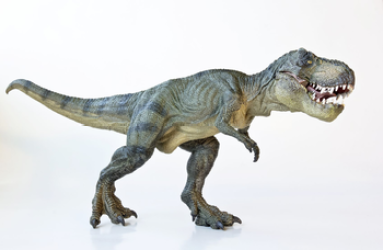

In [15]:
resized = resize(image, new_height=250)
cv2_to_PIL(resized)

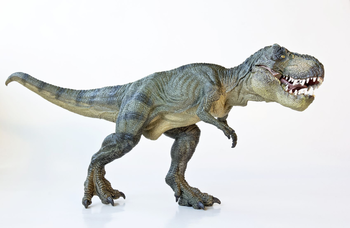

In [16]:
resized = resize(image)
cv2_to_PIL(resized)

__Flipping__: Either on x axis, or y axis or both

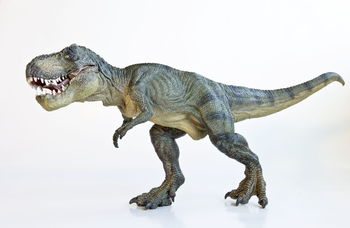

In [17]:
flipped = cv2.flip(image,1) #Flips horizontally
cv2_to_PIL(flipped)

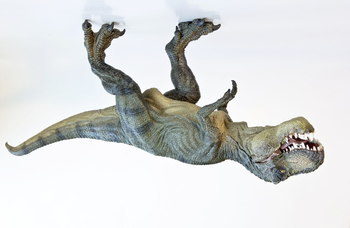

In [18]:
flipped = cv2.flip(image,0) #Flips vertically
cv2_to_PIL(flipped)

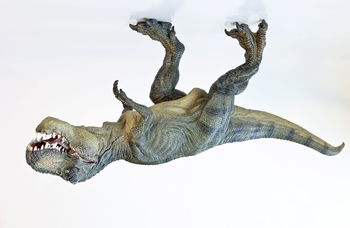

In [19]:
flipped = cv2.flip(image,-1) #Flips horizontally & vertically
cv2_to_PIL(flipped)

__Cropping__:

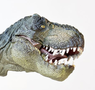

In [20]:
cropped = image[30:120,240:335]
cv2_to_PIL(cropped)

### Image Arithmetic
- To make sure that the pixel values fall in the range [0,255]
- cv2 ensures that pixel values never fall outside the range [0, 255].

In [21]:
print("max of 255: {}".format(cv2.add(np.uint8([200]),np.uint8([100]))))

max of 255: [[255]]


Notice that in the above cell, although $ 200+100 = 200 $, the max pixel value is 255

In [22]:
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))

min of 0: [[0]]


Notice that in the above cell, although $ 50-100=-50 $, the min pixel value is 0

In [23]:
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))

wrap around: [44]


While performing arithmetic ops using numpy, Once a value of 255 is reached, NumPy wraps around to zero, and then starts counting up again, until 100 steps have been reached.<br>
300 - 255 = 45. wrapping to 0. <br>
Therefore, 45-1 = 44

In [24]:
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

wrap around: [206]


Similarly, $ 300-50+1 = 206 $

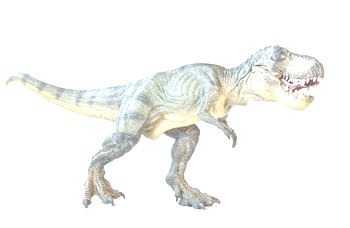

In [25]:
#Increase every pixel's intensity by 100 i.e, image become lighter. 
mask = np.ones(image.shape, dtype='uint8') * 100
added_image = cv2.add(image, mask)
cv2_to_PIL(added_image)

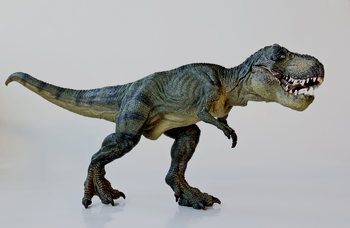

In [26]:
#Decrease every pixel's intensity by 50 i.e., image become darker
mask = np.ones(image.shape, dtype='uint8') * 50
subtracted_image = cv2.subtract(image,mask)
cv2_to_PIL(subtracted_image)

### Bitwise Operations
- Bitwise operations operate in a binary manner and are represented as grayscale images.


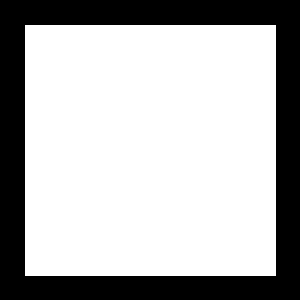

In [27]:
rectangle = np.zeros((300,300), dtype='uint8')
cv2.rectangle(rectangle, (25,25), (275,275),255, -1)
cv2_to_PIL(rectangle)

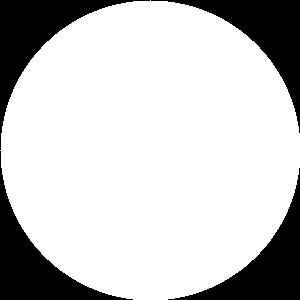

In [28]:
circle = np.zeros((300,300), dtype='uint8')
cv2.circle(circle, (150,150), 150, 255, -1)
cv2_to_PIL(circle)

#### AND: A bitwise AND is true if and only if both pixels are greater than zero.

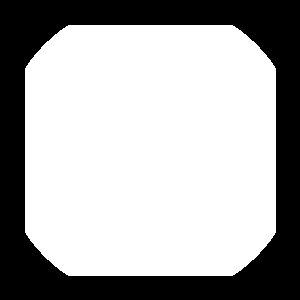

In [29]:
bitwise_and = cv2.bitwise_and(rectangle,circle)
cv2_to_PIL(bitwise_and)

#### OR: A bitwise OR is true if either of the two pixels are greater than zero.

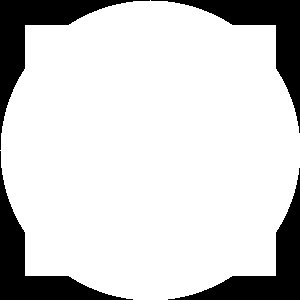

In [30]:
bitwise_or = cv2.bitwise_or(rectangle,circle)
cv2_to_PIL(bitwise_or)

#### XOR: A bitwise XOR is true if and only if either of the two pixels are greater than zero, but not both.

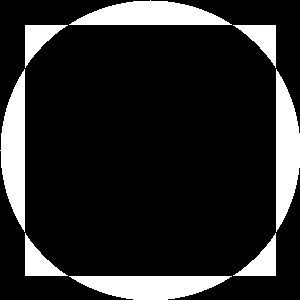

In [31]:
bitwise_xor = cv2.bitwise_xor(rectangle,circle)
cv2_to_PIL(bitwise_xor)

#### NOT: A bitwise NOT inverts the “on” and “off” pixels in an image.

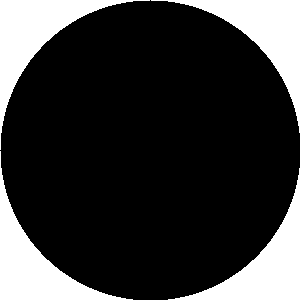

In [32]:
bitwise_not = cv2.bitwise_not(circle)
cv2_to_PIL(bitwise_not)

### Masking:
To focus on the RoI <br>
Ex: Face recognition: construct a mask to show only the faces in the image.

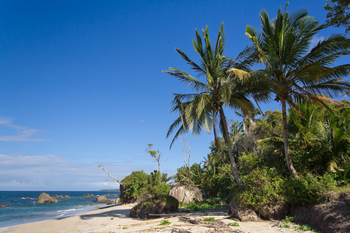

In [33]:
beach = cv2.imread('../data/beach.png')
cv2_to_PIL(beach)

For example, our RoI is just the sky & the plam trees. 

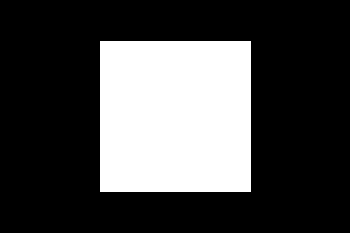

In [34]:
# Create a rectangular mask
rect_mask = np.zeros(beach.shape[:2], dtype='uint8')
(center_x,center_y) = (beach.shape[1]//2, beach.shape[0]//2)
cv2.rectangle(rect_mask,(center_x-75, center_y-75),(center_x+75, center_y+75),255,-1)
cv2_to_PIL(rect_mask)

By supplying a mask, the cv2.bitwise_and function only examines pixels that are “on” in the mask.

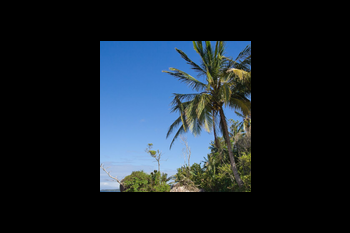

In [35]:
masked = cv2.bitwise_and(beach,beach, mask=rect_mask)
cv2_to_PIL(masked)

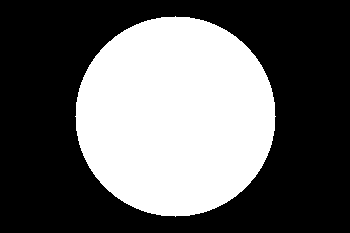

In [36]:
circle_mask = np.zeros(beach.shape[:2], dtype='uint8')
cv2.circle(circle_mask, (center_x,center_y), 100, 255, -1)
cv2_to_PIL(circle_mask)

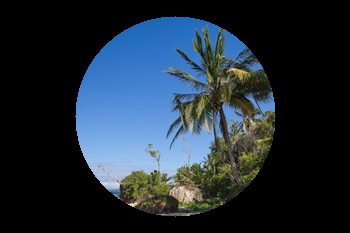

In [37]:
circular_masked = cv2.bitwise_and(beach, beach, mask=circle_mask)
cv2_to_PIL(circular_masked)

### Splitting and Merging Channels

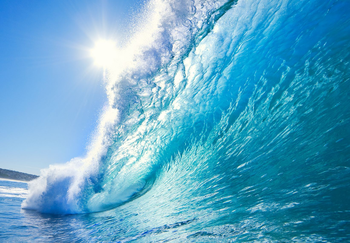

In [38]:
wave = cv2.imread('../data/wave.png')
cv2_to_PIL(wave)

In [39]:
(B,G,R) = cv2.split(wave)

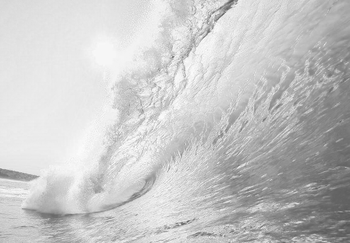

In [40]:
# Blue image
cv2_to_PIL(B)

This is extremely light, and near pure white in some locations. This is because shades of blue are heavily represented in our image.

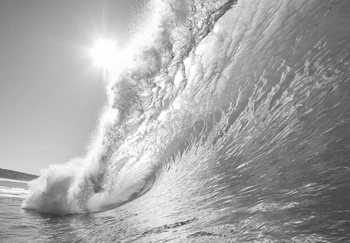

In [41]:
# Green Image
cv2_to_PIL(G)

This is more represented in the image, since ocean water does contain greenish hues.

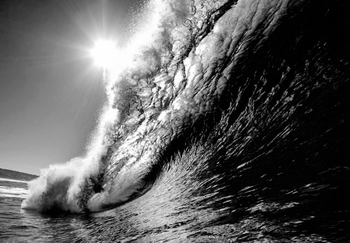

In [42]:
# Red Image
cv2_to_PIL(R)

This is very dark because an ocean scene has very few red colors in it. The red colors present are either very dark, and thus not represented, or very light, and likely part of the white foam of the wave as it crashes down.

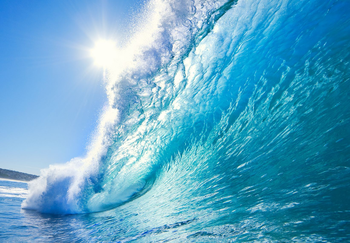

In [43]:
merged = cv2.merge([B,G,R])
cv2_to_PIL(merged)

Another way to split the channels is to write an image with all the colors to ```zeros``` except the required channel.

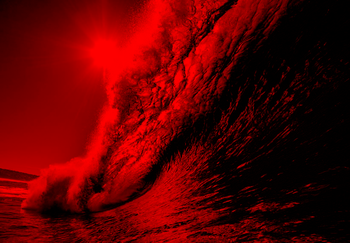

In [44]:
zeros = np.zeros(wave.shape[:2], dtype='uint8')
cv2_to_PIL(cv2.merge([zeros,zeros,R]))

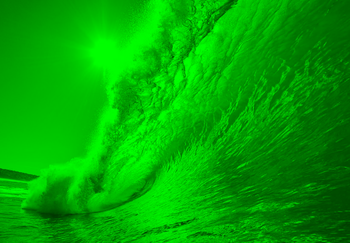

In [45]:
cv2_to_PIL(cv2.merge([zeros,G,zeros]))

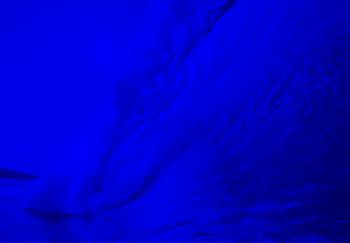

In [46]:
cv2_to_PIL(cv2.merge([B,zeros,zeros]))